## <span style="color:#000066"> Question 9: Auto Dataset </span> 

In [1]:
from chapter2_imports import *

### Description

In this exercise we will explore _**Auto dataset**_ which contains information abour 392 vehicles. Our goal will be to predict mpg base don horsepower using linear regression and its variants.

<a>

- Description: Gas mileage, horsepower, and other information for 392 vehicles.
    
- Usage: Auto - Auto Data Set
    
- Format: A data frame with 392 observations on the following 9 variables.
    - __*mpg*__: miles per gallon
    
    - __*cylinders*__: Number of cylinders between 4 and 8
    - __*displacement*__: Engine displacement (cu. inches)
    - __*horsepower*__: Engine horsepower
    - __*weight*__: Vehicle weight (lbs.)
    - __*acceleration*__: Time to accelerate from 0 to 60 mph (sec.)
    - __*year*__: Model year (modulo 100)
    - __*origin*__: Origin of car (1. American, 2. European, 3. Japanese)
    - __*name*__: Vehicle name

 The orginal data contained 408 observations but 16 observations with missing values were removed.
</a>

__*Source-*__ 
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
The dataset was used in the 1983 American Statistical Association Exposition.

### Loading and Cleaning data

In [2]:
auto_dataset = pd.read_csv('../data/Auto.csv')
auto_dataset.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [3]:
auto_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


- We can observe that horsepower column is *object* not numeric. Hence we will convert it to numeric. **error=coerce** replaces values which cannot be converted into numeric into NaN

In [4]:
auto_dataset['horsepower'] = pd.to_numeric(auto_dataset['horsepower'], errors='coerce')

In [5]:
auto_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


Horsepower column is now float. But we can observe there are only 392 values instead of 397. 5 values were '?' which represented NaN in original dataset.

- Setting column *name* as index and dropping rows where any of the column has missing value.

In [6]:
auto_dataset.set_index('name', inplace=True)

In [7]:
auto_dataset.dropna(inplace=True)
auto_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6+ KB


### Descriptive Analysis

In [8]:
auto_dataset.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

- Origin is qualitative (Nominal).
- Year is qualitative (Ordinal).
- While other columns are cardinal in nature.

- With *describe* function we get the basic details of all the columns. Range of values, mean, median and all quartiles.

### Exploratory Data Analysis

In [9]:
auto_dataset['origin'] = auto_dataset['origin'].astype('category')

#### Pair Plot

Pair plot is best way to ovberview the data visually. It will provide information about the distribution of various features along with how they interact with each other.

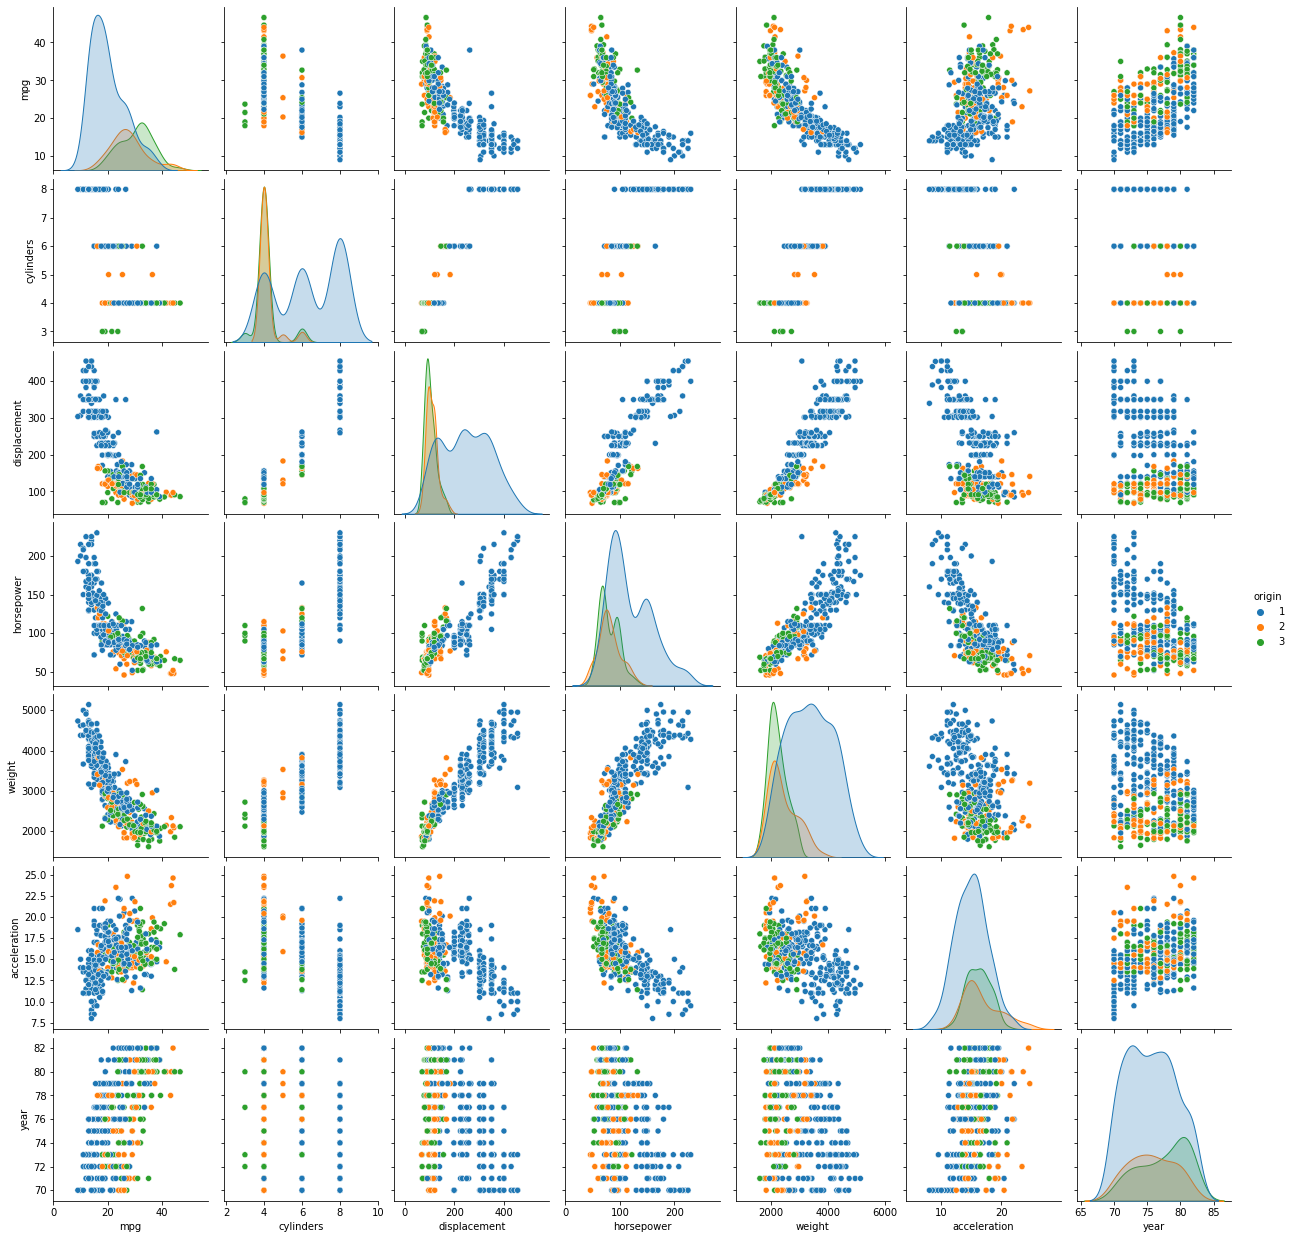

In [10]:
sns.pairplot(auto_dataset, hue='origin')

- There is lot of information inside pair plot. We will just scratch the surface and state few observations:
    - 'MPG' has negetive relationship with 'displacement', 'horsepower' and 'weight' which is convex in nature.
    - We see most fo the high diplacement, horsepower and weight cars originated from America.
    - Most of the European cars were 4 cylinder with few 5 and 6 cylinders. Japanese manufacturers mostly developed cars with 3 cannd 4 cylinders and few 6 cylinder cars. 
    - American cars had more focus  on displacement.
    - Displacement, horsepower and weight are directly proposrtional.
    - Over the year focus of american cars have moved from displacement to acceleration.

#### Point Plot

Point plot below will help us to see how particular variable for given region of origin evolved over years. <br>
Marker represents *mean* while line arounnd its shows spread of 1 *standard deviation* above and below. Thus giving idea of both *cenntral tenedency* and *measure of dispresion*.

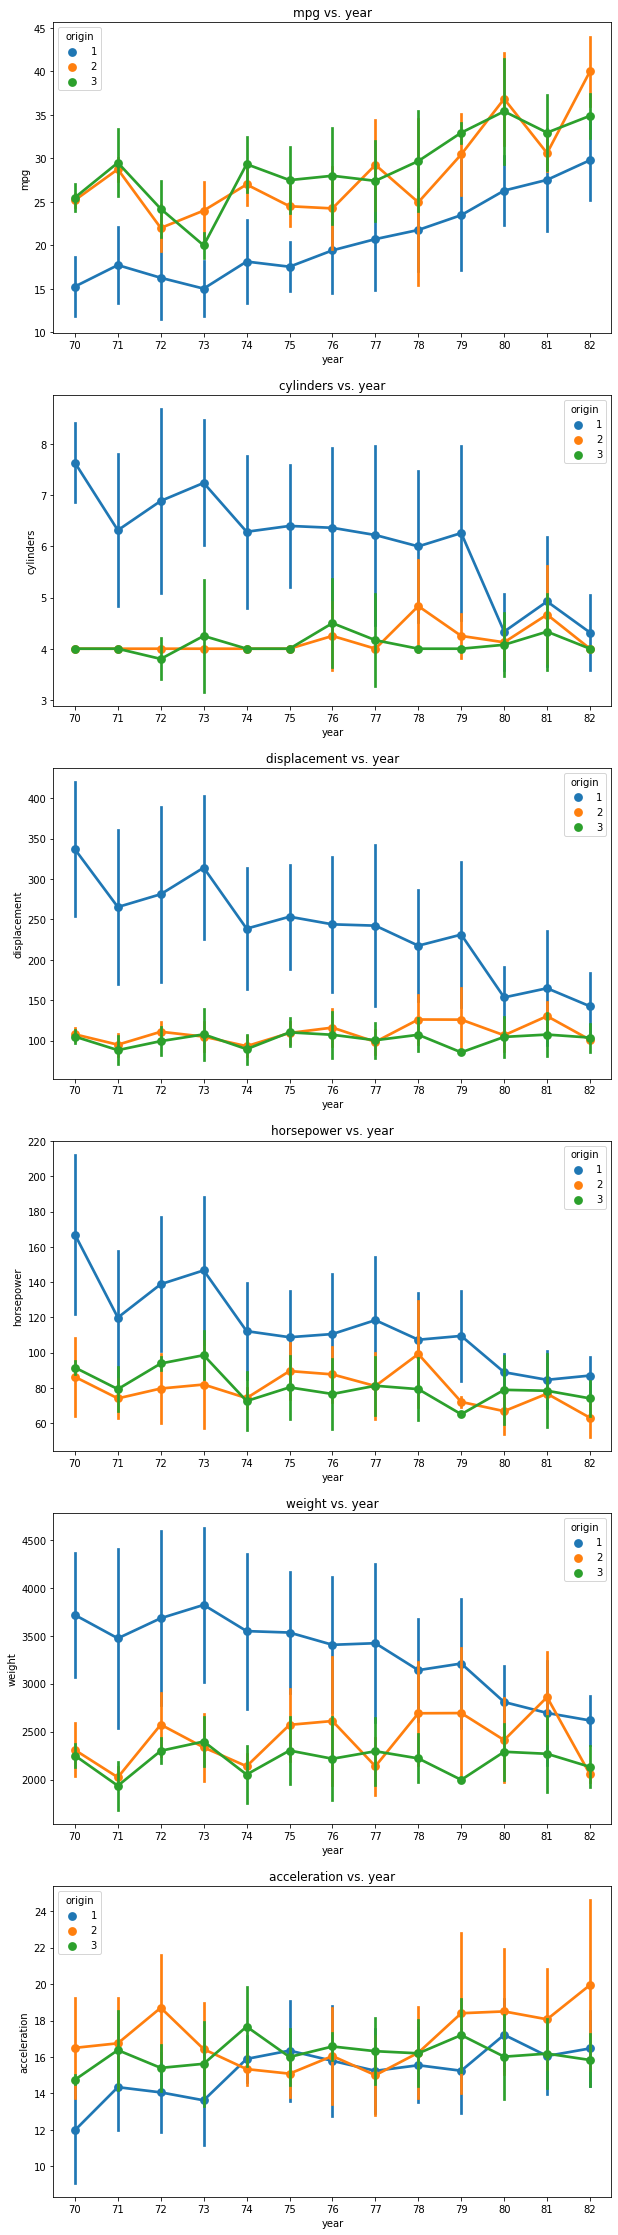

In [11]:
fig, ax =plt.subplots(6, 1, figsize=(10, 40))
for i, column in enumerate(auto_dataset.columns[:-2]):
    sns.pointplot(x="year", y=column, hue='origin', data=auto_dataset, ci='sd', ax=ax[i]).set(title=f'{column} vs. year')

- Below we have mentioned few observations from the point plots:
    - Over years mpg has increase for cars from all origins. 
    - On average Japanese and European cars have better mpg than American cars.
    - American cars in 1970s had more no. of cylinders as compared to Japanese and European counterparts. But by early 1980s, no.s of cylinders reduced in American cars and become in line with Japanese and European couterparts.
    - While the displacement of European and Japanese cars remain constant over years, displacement of American cars decreased but still by 1980s its higher than others. Same is the story with horsepower.
    - In early 1970s acceleration of European cars was best and American were worst. By early 1980s, while acceleration of American cars increase that of Japanese almost remain constant and hence acceleration for both became comparable. Acceleration fo European cars still remains greater on average with large variation as compared to Japanese and American counterparts.

#### Interation of MPG withh other variables

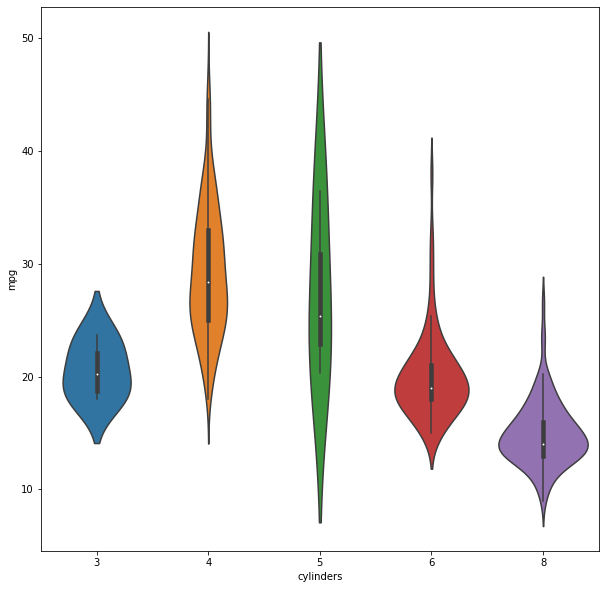

In [12]:
sns.violinplot(x='cylinders', y='mpg', data=auto_dataset)
plt.show()

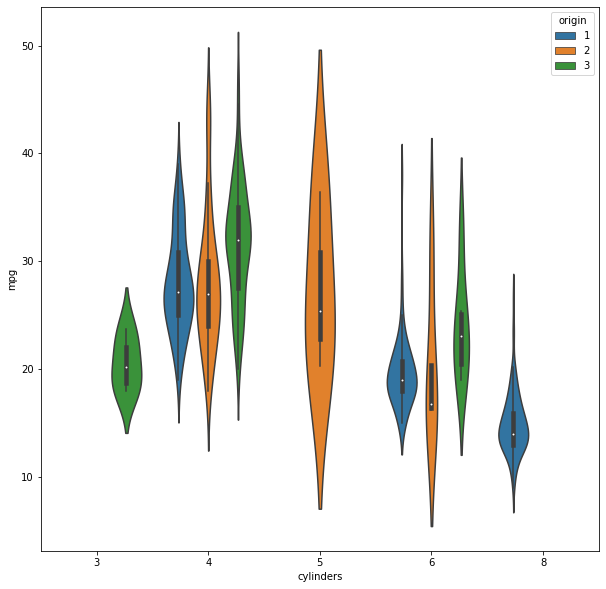

In [13]:
sns.violinplot(x='cylinders', y='mpg', hue='origin', data=auto_dataset)
plt.show()

- Other than Japenese cars with 3 cylinders we see that mpg decreases with increase in no. of cylinders.
- This relationship is most prominent in American cars.

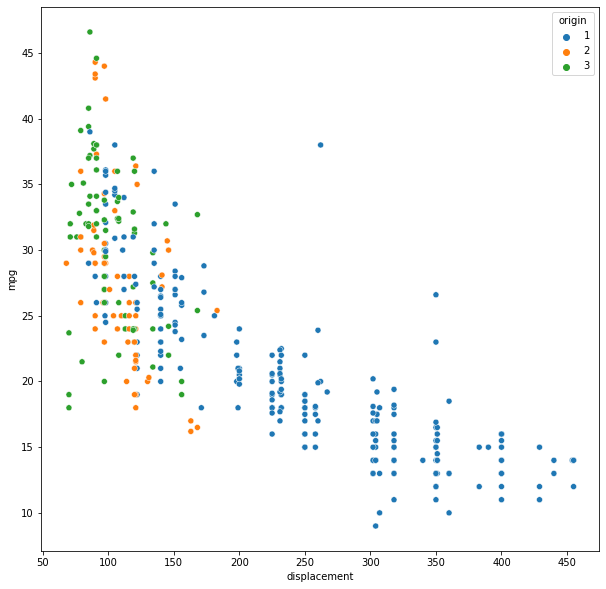

In [14]:
sns.scatterplot(y='mpg', x='displacement', data=auto_dataset, hue='origin')
plt.show()

- There is negetive convex relation between displacement and mpg.

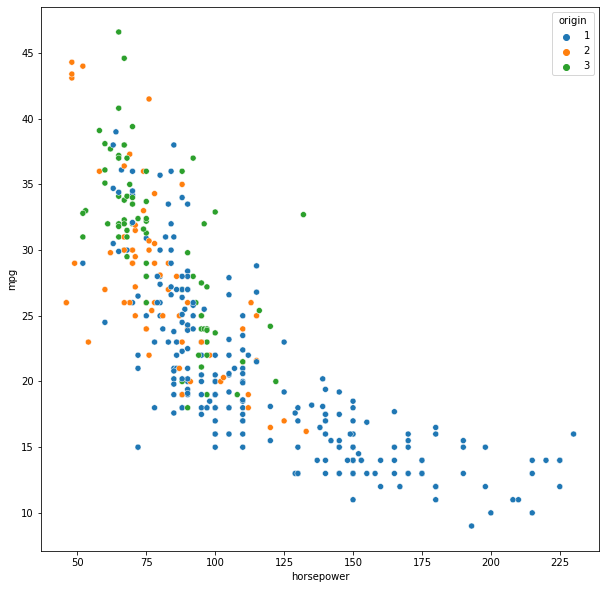

In [15]:
sns.scatterplot(y='mpg', x='horsepower', data=auto_dataset, hue='origin')
plt.show()

- There is negetive convex relation between horsepower and mpg.

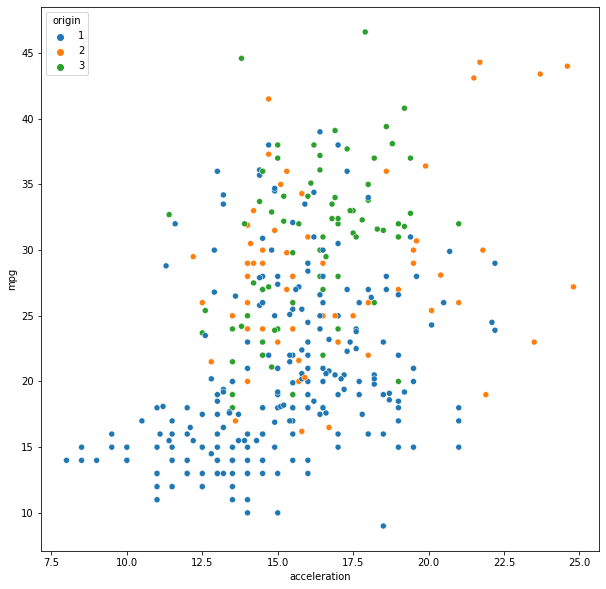

In [16]:
sns.scatterplot(y='mpg', x='acceleration', data=auto_dataset, hue='origin')
plt.show()

- We don't see much significant relation between acceleration and mpg.